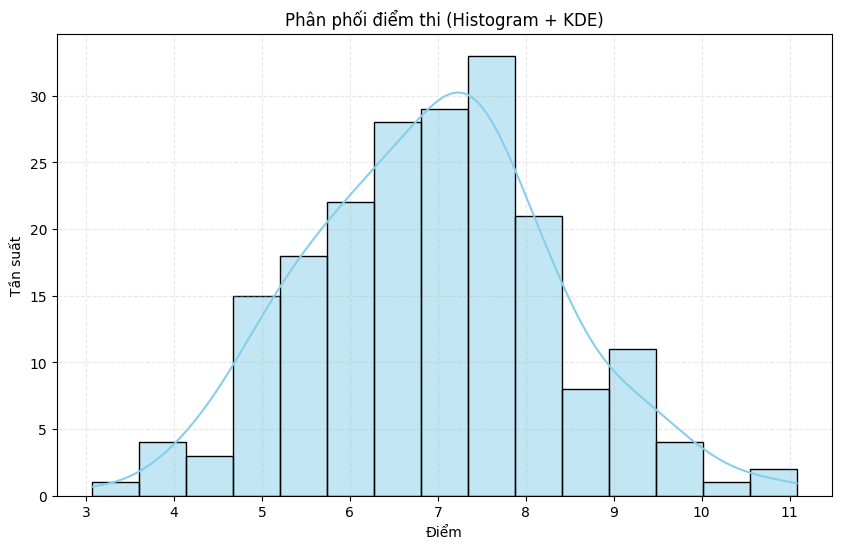

In [ ]:
# Bài 1:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
scores = np.random.normal(7, 1.5, 200)

plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=15, kde=True, color='skyblue', edgecolor='black')

plt.title("Phân phối điểm thi (Histogram + KDE)")
plt.xlabel("Điểm")
plt.ylabel("Tần suất")
plt.grid(alpha=0.3, linestyle="--")

plt.show()


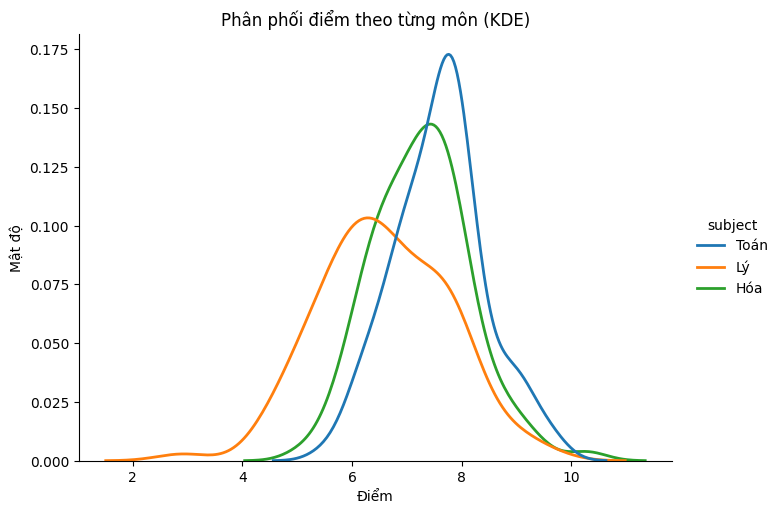

In [ ]:
# Bài 2:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

subjects = ["Toán", "Lý", "Hóa"]
scores = np.random.normal(loc=[7.5, 6.8, 7.2], scale=[1.0, 1.2, 0.8], size=(100, 3))

df = pd.DataFrame({
    "subject": np.repeat(subjects, 100),
    "score": scores.flatten(order='F')
})

sns.displot(
    data=df,
    x="score",
    hue="subject",
    kind="kde",
    fill=False,
    linewidth=2,
    height=5,
    aspect=1.4
)

plt.title("Phân phối điểm theo từng môn (KDE)")
plt.xlabel("Điểm")
plt.ylabel("Mật độ")
plt.show()


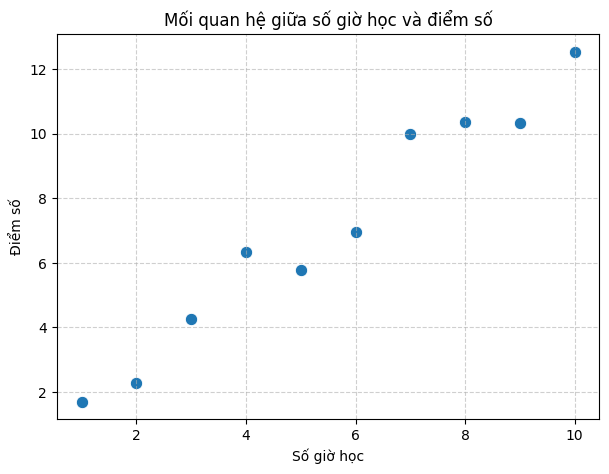

In [ ]:
# Bài 3:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

hours = np.arange(1, 11)
noise = np.random.normal(0, 1, size=10)
score = hours * 1.2 + noise

df = pd.DataFrame({
    "hours": hours,
    "score": score
})

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="hours", y="score", s=80)
plt.title("Mối quan hệ giữa số giờ học và điểm số")
plt.xlabel("Số giờ học")
plt.ylabel("Điểm số")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


C:\Users\HONG NHUNG\AppData\Local\Temp\ipykernel_20560\2651247469.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="class", y="score", errorbar="sd", palette="Set2")


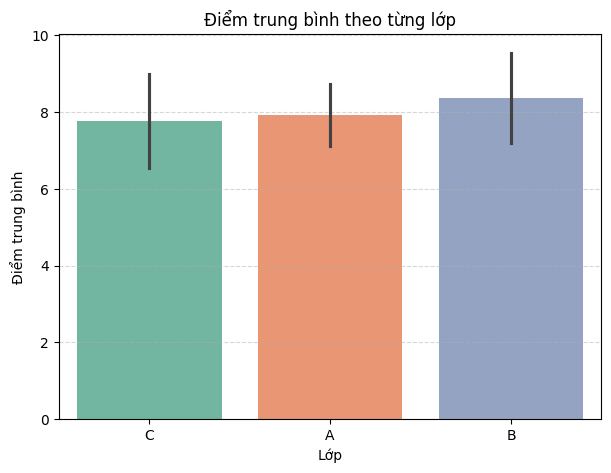

In [ ]:
# Bài 4:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

classes = np.random.choice(["A", "B", "C"], size=30)
scores = np.random.normal(loc=8, scale=1, size=30)

df = pd.DataFrame({
    "class": classes,
    "score": scores
})

plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="class", y="score", errorbar="sd", palette="Set2")
plt.title("Điểm trung bình theo từng lớp")
plt.xlabel("Lớp")
plt.ylabel("Điểm trung bình")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


=== Thống kê tóm tắt theo ngành ===
   major  count  median    q1    q3   iqr  mean   std   min    max
    CNTT     80   7.622 6.886 8.511 1.626 7.622 1.331 4.132 10.000
 Kinh Tế     70   6.989 6.332 7.456 1.124 6.965 0.929 5.081  9.463
Ngôn Ngữ     50   6.716 6.154 6.954 0.800 6.650 0.536 5.691  8.232


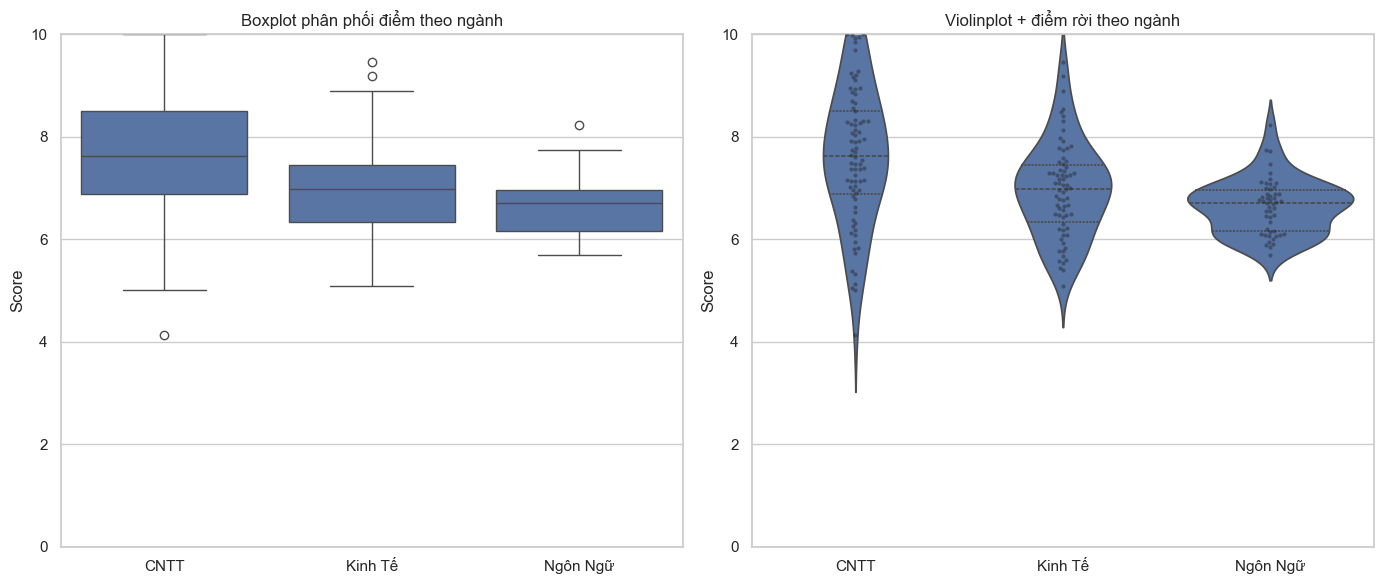


=== Nhận xét ===
- Trung vị cao nhất: CNTT
- Trung vị thấp nhất: Ngôn Ngữ
- Phân tán (IQR) rộng nhất: CNTT
- Phân tán (IQR) hẹp nhất: Ngôn Ngữ

Tóm lại:
-> Nhóm CNTT có trung vị/điểm trung bình cao hơn, nhưng nếu IQR lớn (như CNTT) thì điểm trong nhóm này biến động mạnh.
-> Nhóm Ngôn Ngữ có phân phối tập trung hơn (ít biến động), dễ thấy điểm đồng đều hơn.


In [6]:
# Bài 5:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_cntt = 80
n_kt = 70
n_nn = 50

cntt_scores = np.random.normal(loc=7.8, scale=1.4, size=n_cntt)

kt_scores = np.random.normal(loc=7.0, scale=1.0, size=n_kt)

nn_scores = np.random.normal(loc=6.6, scale=0.6, size=n_nn)

all_scores = np.clip(np.concatenate([cntt_scores, kt_scores, nn_scores]), 0, 10)

majors = (["CNTT"] * n_cntt) + (["Kinh Tế"] * n_kt) + (["Ngôn Ngữ"] * n_nn)
df = pd.DataFrame({"major": majors, "score": all_scores})

summary = df.groupby("major")["score"].agg(
    count="count",
    median=lambda x: np.median(x),
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75),
    iqr=lambda x: np.percentile(x, 75) - np.percentile(x, 25),
    mean="mean",
    std="std",
    min="min",
    max="max"
).reset_index()

print("=== Thống kê tóm tắt theo ngành ===")
print(summary.round(3).to_string(index=False))

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x="major", y="score", data=df, ax=axes[0])
axes[0].set_title("Boxplot phân phối điểm theo ngành")
axes[0].set_ylim(0, 10)
axes[0].set_xlabel("")
axes[0].set_ylabel("Score")

sns.violinplot(x="major", y="score", data=df, inner="quartile", ax=axes[1])
sns.swarmplot(x="major", y="score", data=df, color="k", alpha=0.4, size=3, ax=axes[1])
axes[1].set_title("Violinplot + điểm rời theo ngành")
axes[1].set_ylim(0, 10)
axes[1].set_xlabel("")
axes[1].set_ylabel("Score")

plt.tight_layout()
plt.show()

print("\n=== Nhận xét ===")
medians = summary.set_index("major")["median"]
highest_median = medians.idxmax()
lowest_median = medians.idxmin()
print(f"- Trung vị cao nhất: {highest_median}")
print(f"- Trung vị thấp nhất: {lowest_median}")

iqrs = summary.set_index("major")["iqr"]
widest = iqrs.idxmax()
narrowest = iqrs.idxmin()
print(f"- Phân tán (IQR) rộng nhất: {widest}")
print(f"- Phân tán (IQR) hẹp nhất: {narrowest}")

print("\nTóm lại:")
print(f"-> Nhóm {highest_median} có trung vị/điểm trung bình cao hơn, nhưng nếu IQR lớn (như {widest}) thì điểm trong nhóm này biến động mạnh.")
print(f"-> Nhóm {narrowest} có phân phối tập trung hơn (ít biến động), dễ thấy điểm đồng đều hơn.")


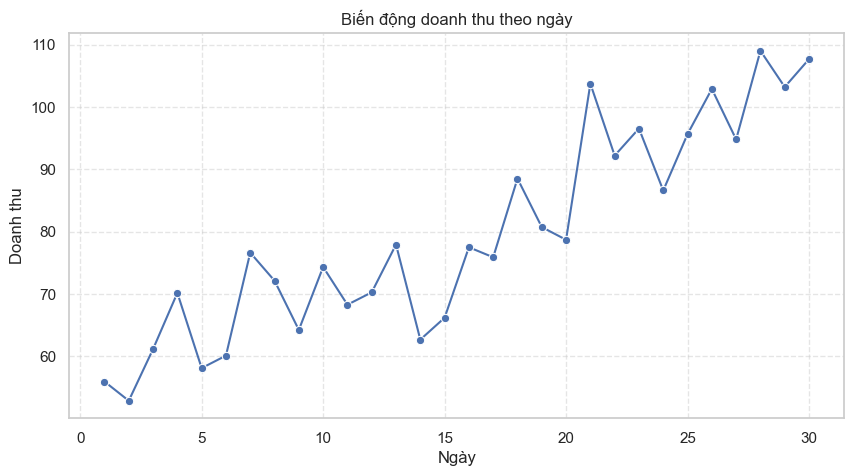

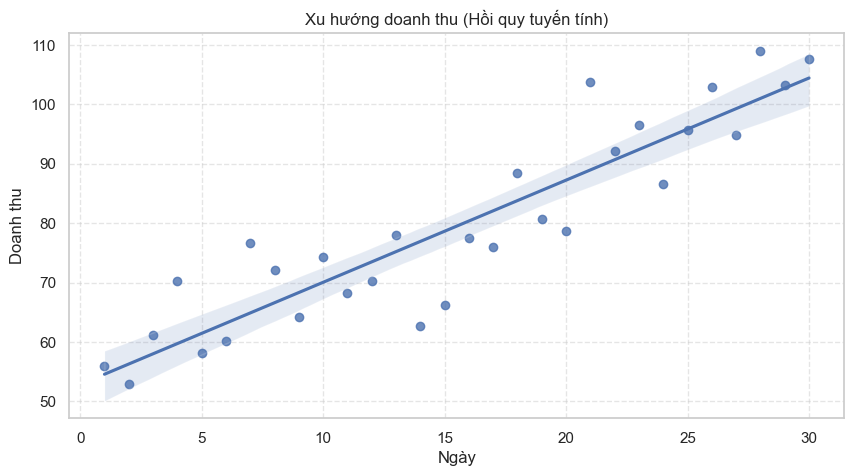


=== NHẬN XÉT ===
- Hệ số dốc > 0 (1.72): doanh thu có xu hướng TĂNG theo thời gian.
- Nhìn lineplot có thể thấy doanh thu dao động theo ngày (do noise), nên không hoàn toàn mượt.
- Regplot giúp phơi ra xu hướng tổng thể: đường hồi quy càng dốc thì tốc độ tăng/giảm càng mạnh.


In [7]:
# Bài 6:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

day = np.arange(1, 31)

sales = 50 + day * 2 + np.random.normal(0, 8, size=30)

df = pd.DataFrame({
    "day": day,
    "sales": sales
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="day", y="sales", marker="o")
plt.title("Biến động doanh thu theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(data=df, x="day", y="sales")
plt.title("Xu hướng doanh thu (Hồi quy tuyến tính)")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

coef = np.polyfit(df["day"], df["sales"], 1)[0]

print("\n=== NHẬN XÉT ===")
if coef > 0:
    print(f"- Hệ số dốc > 0 ({coef:.2f}): doanh thu có xu hướng TĂNG theo thời gian.")
elif coef < 0:
    print(f"- Hệ số dốc < 0 ({coef:.2f}): doanh thu đang GIẢM dần.")
else:
    print("- Đường hồi quy gần như nằm ngang: doanh thu không có xu hướng rõ ràng.")

print("- Nhìn lineplot có thể thấy doanh thu dao động theo ngày (do noise), nên không hoàn toàn mượt.")
print("- Regplot giúp phơi ra xu hướng tổng thể: đường hồi quy càng dốc thì tốc độ tăng/giảm càng mạnh.")


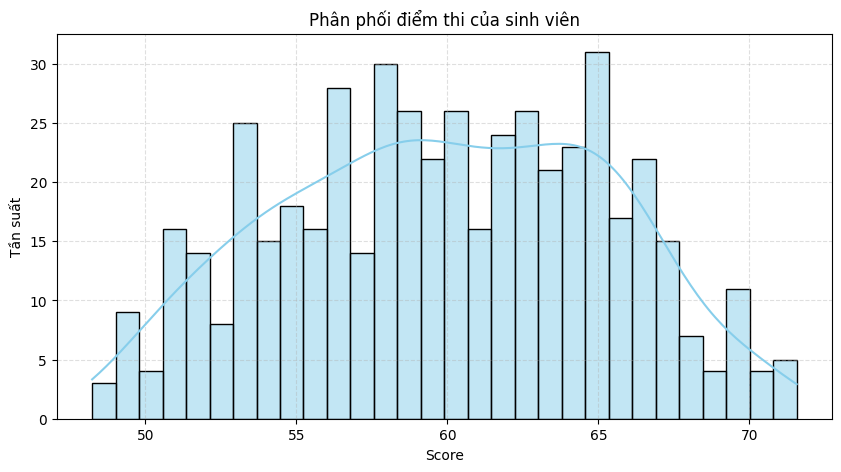

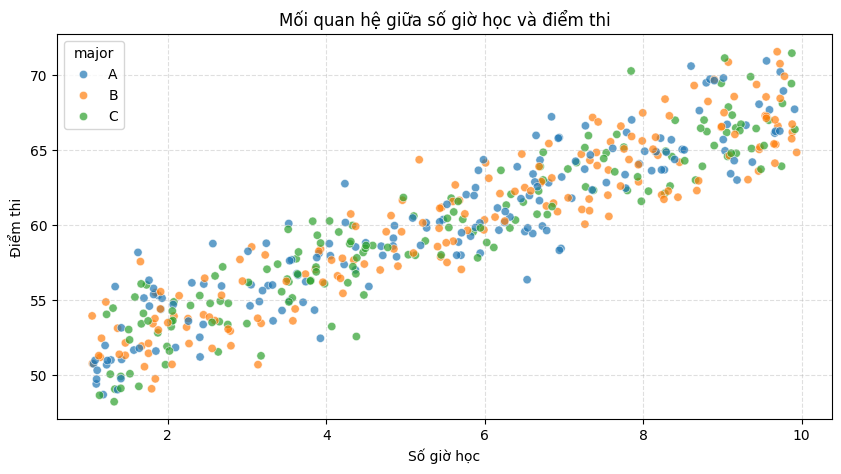

C:\Users\HONG NHUNG\AppData\Local\Temp\ipykernel_8988\3134145769.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="major", y="score", palette="Set2")


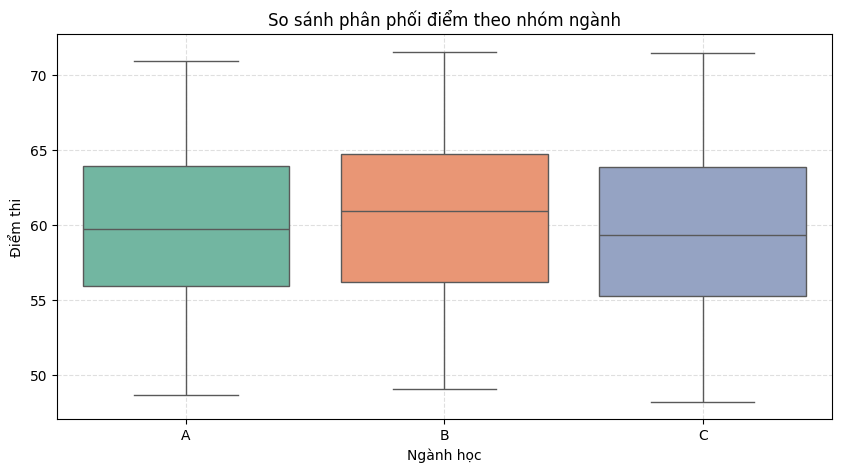


========== KẾT LUẬN ==========

1. Phân phối điểm:
- Điểm trung bình khoảng 59.9, độ lệch chuẩn 5.4.
- Đường KDE cho thấy điểm tập trung mạnh ở vùng trung bình–khá.

2. Mối quan hệ giữa giờ học và điểm:
- Hệ số hồi quy dương (1.85): giờ học tăng thì điểm có xu hướng tăng.
- Scatterplot cho thấy xu hướng tuyến tính khá rõ.

3. So sánh nhóm ngành:
- Điểm trung bình theo ngành:
major
A    59.810799
B    60.336943
C    59.482742
Name: score, dtype: float64
- Boxplot cho thấy mức phân tán của từng ngành khác nhau, có ngành ổn định hơn ngành khác.


In [1]:
# Bài 7:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

n = 500
hours = np.random.uniform(1, 10, n)
noise = np.random.normal(0, 2, n)
score = hours * 1.8 + 50 + noise

majors = np.random.choice(["A", "B", "C"], size=n)

df = pd.DataFrame({
    "hours": hours,
    "score": score,
    "major": majors
})

plt.figure(figsize=(10, 5))
sns.histplot(df["score"], kde=True, bins=30, color="skyblue")
plt.title("Phân phối điểm thi của sinh viên")
plt.xlabel("Score")
plt.ylabel("Tần suất")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="hours", y="score", hue="major", alpha=0.7)
plt.title("Mối quan hệ giữa số giờ học và điểm thi")
plt.xlabel("Số giờ học")
plt.ylabel("Điểm thi")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="major", y="score", palette="Set2")
plt.title("So sánh phân phối điểm theo nhóm ngành")
plt.xlabel("Ngành học")
plt.ylabel("Điểm thi")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

print("\n========== KẾT LUẬN ==========")
mean_score = df["score"].mean()
std_score = df["score"].std()

print(f"\n1. Phân phối điểm:")
print(f"- Điểm trung bình khoảng {mean_score:.1f}, độ lệch chuẩn {std_score:.1f}.")
print("- Đường KDE cho thấy điểm tập trung mạnh ở vùng trung bình–khá.")

coef = np.polyfit(df["hours"], df["score"], 1)[0]
trend = "tăng" if coef > 0 else "giảm"

print("\n2. Mối quan hệ giữa giờ học và điểm:")
print(f"- Hệ số hồi quy dương ({coef:.2f}): giờ học tăng thì điểm có xu hướng {trend}.")
print("- Scatterplot cho thấy xu hướng tuyến tính khá rõ.")

group_means = df.groupby("major")["score"].mean()

print("\n3. So sánh nhóm ngành:")
print(f"- Điểm trung bình theo ngành:\n{group_means}")
print("- Boxplot cho thấy mức phân tán của từng ngành khác nhau, có ngành ổn định hơn ngành khác.")


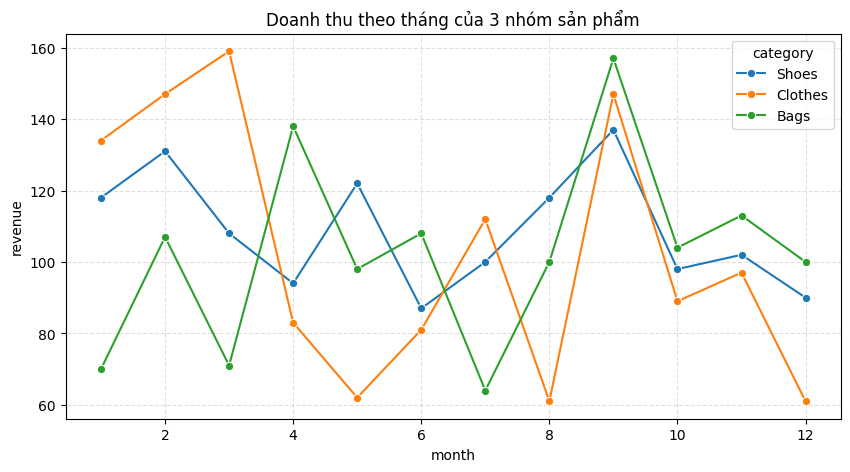

C:\Users\HONG NHUNG\AppData\Local\Temp\ipykernel_8988\1275306770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="category", y="revenue", palette="Set2")


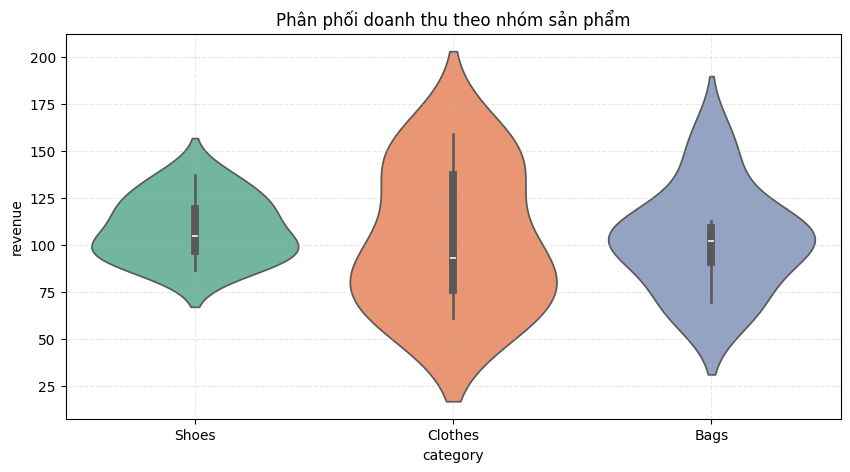

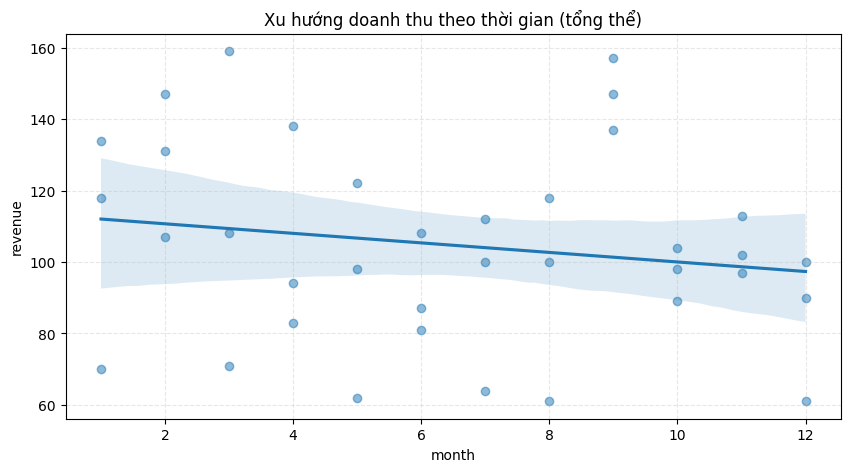


======= PHÂN TÍCH TỔNG QUAN =======

Thống kê theo nhóm:
             mean        std
category                   
Bags      102.50  26.895420
Clothes   102.75  36.148997
Shoes     108.75  16.293473 

Nhận xét:
- Shoes thường dao động nhẹ hơn, revenue khá ổn định theo tháng.
- Clothes biến động rõ hơn, có tháng lên khá cao rồi lại hạ nhiệt.
- Bags là nhóm thất thường nhất, spread rộng và chênh lệch mạnh giữa các tháng.
- Đường hồi quy tổng cho thấy doanh thu *hơi* nghiêng về xu hướng tăng nhẹ theo thời gian.
- Nhìn chung có sự chênh lệch đáng kể giữa ba nhóm, đặc biệt Bags dễ tạo outlier hơn.


In [2]:
# Bài 8:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

months = np.tile(np.arange(1, 13), 3)
categories = np.repeat(["Shoes", "Clothes", "Bags"], 12)

revenue = (
    np.random.randint(80, 140, 12).tolist() + 
    np.random.randint(60, 160, 12).tolist() +
    np.random.randint(50, 180, 12).tolist() 
)

df = pd.DataFrame({
    "month": months,
    "category": categories,
    "revenue": revenue
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="month", y="revenue", hue="category", marker="o")
plt.title("Doanh thu theo tháng của 3 nhóm sản phẩm")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="category", y="revenue", palette="Set2")
plt.title("Phân phối doanh thu theo nhóm sản phẩm")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(x=df["month"], y=df["revenue"], scatter_kws={"alpha":0.5})
plt.title("Xu hướng doanh thu theo thời gian (tổng thể)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

print("\n======= PHÂN TÍCH TỔNG QUAN =======\n")

group_stats = df.groupby("category")["revenue"].agg(["mean", "std"])

print("Thống kê theo nhóm:\n", group_stats, "\n")

print("Nhận xét:")
print("- Shoes thường dao động nhẹ hơn, revenue khá ổn định theo tháng.")
print("- Clothes biến động rõ hơn, có tháng lên khá cao rồi lại hạ nhiệt.")
print("- Bags là nhóm thất thường nhất, spread rộng và chênh lệch mạnh giữa các tháng.")
print("- Đường hồi quy tổng cho thấy doanh thu *hơi* nghiêng về xu hướng tăng nhẹ theo thời gian.")
print("- Nhìn chung có sự chênh lệch đáng kể giữa ba nhóm, đặc biệt Bags dễ tạo outlier hơn.")
